# Logistic Regression

In [1]:
%load_ext autoreload

In [2]:
%autoreload 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import logistic_regression as lr   # <-- Your implementation

sns.set_style('darkgrid') # Seaborn plotting style 

## First Dataset

The first dataset is a simple problem that can be used to debug your algorithm. The objective is to predict whether the dependent variable ($y$) should be equal to 1 or 0 based on two independent variables ($x_0$ and $x_1$).

### [1.1] Load Data

We begin by loading data from the .csv file located in the same folder as this notebook.

In [179]:
data_1 = pd.read_csv('data_1.csv')
data_1.head()

,x0,x1,y
0,0.167745,0.025549,0.0
1,0.916503,0.744718,1.0
2,0.056172,0.586527,0.0
3,0.453699,0.495267,1.0
4,0.621778,0.437974,1.0


### [1.2] Visualize

Since the feature-space is continuous and 2-dimensional, it lends itself nicely to visualization with a scatter plot.

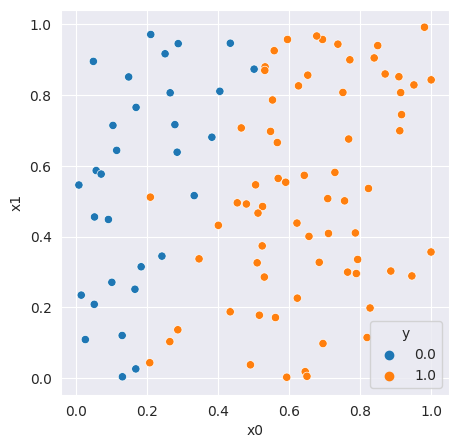

In [180]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x='x0', y='x1', hue='y', data=data_1);

### [1.3] Train and Evaluate

Next we fit and evaluate a Logistic Regression classifier over the dataset. We first partition the data into the dependent (`y`) and independent (`X`) variables. We then initialize a Logistic Regression classifier and fit it to all the data. Finally, we evaluate the model over the same data by calculating _accuracy_ and (binary) _cross entropy_.

- The accuracy is given by the fraction of correctly classified samples. Since the Logistic Regression classifier outputs "soft" predictions ($\hat{y} \in (0, 1)$), we threshold the predictions so that $\hat{y} \geq 0.5$ is considered a $1$ and $\hat{y} < 0.5$ is considered a $0$.

- The [cross entropy](https://en.wikipedia.org/wiki/Cross_entropy) measures the dissimilarity between the distributions of the true labels ($y$) and the "label-probablities" ($\hat{y}$) predicted by your model. It is subject to minimization and (hint) _highly_ related to your maximal likelihood objective.

Note that `.fit` and `.predict` will crash until you implement these two methods in [logistic_regression.py](./logistic_regression.py).

Assuming a standard implementation of logistic regression with batch gradient descent, you should expect to get an accuracy of at least 90%.

Accuracy: 0.960
Cross Entropy: 0.116


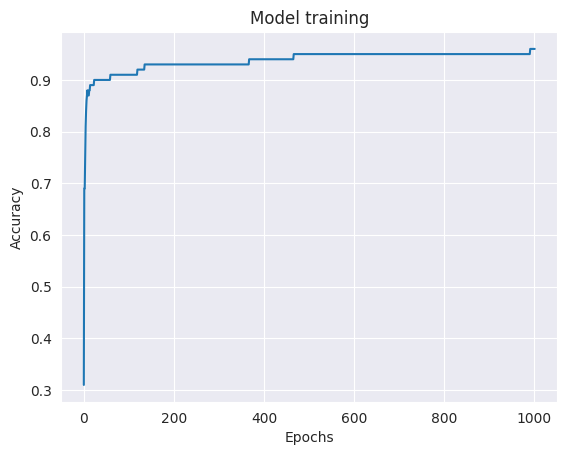

In [188]:
# Partition data into independent (feature) and depended (target) variables
X = data_1[['x0', 'x1']]
y = data_1['y']

# Create and train model.
import logistic_regression as lr
model_1 = lr.LogisticRegression() # <-- Should work with default constructor  
model_1.fit(X, y)

# Calculate accuracy and cross entropy for (insample) predictions 
y_pred = model_1.predict(X)
print(f'Accuracy: {lr.binary_accuracy(y_true=y, y_pred=y_pred, threshold=0.5) :.3f}')
print(f'Cross Entropy: {lr.binary_cross_entropy(y_true=y, y_pred=y_pred) :.3f}')

plt.plot(np.arange(model_1.finishing_epoch+1), model_1.training_accuracies)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model training")
plt.savefig("model_training_1.png")

### [1.4] Visualize Decision Boundary

Logistic Regression does not make hard classification decisions. Instead, it attempts to model the probability of a datapoint belonging to the 1-class after conditioning on the available features ($x_0, x_1$ here). The modeled probability of the 0-class can be obtained by negating and adding one.

We can visualize the modeled probabilities across the entire input space. In the cell below, we rasterize the model's prediction over a grid that covers approximately the same area as the data used to train it. Red regions correspond to high modeled probability for the 1-class whereas blue correspond to high modeled probability for the 0-class. Does the decisions of your model line up well with the provided data? What happens if you train it for longer?

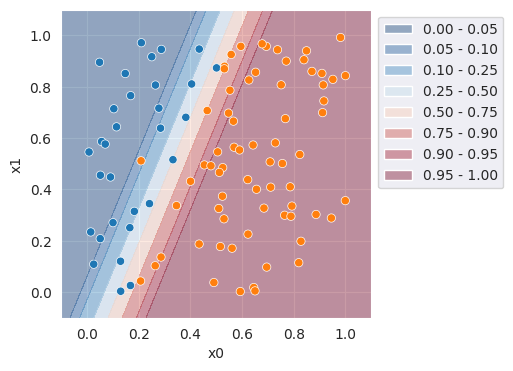

In [182]:
# Rasterize the model's predictions over a grid
xx0, xx1 = np.meshgrid(np.linspace(-0.1, 1.1, 100), np.linspace(-0.1, 1.1, 100))
yy = model_1.predict(np.stack([xx0, xx1], axis=-1).reshape(-1, 2)).reshape(xx0.shape)

# Plot prediction countours along with datapoints
_, ax = plt.subplots(figsize=(4, 4), dpi=100)
levels = [0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1.0]
contours = ax.contourf(xx0, xx1, yy, levels=levels, alpha=0.4, cmap='RdBu_r', vmin=0, vmax=1)
legends = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in contours.collections]
labels = [f'{a :.2f} - {b :.2f}' for a,b in zip(levels, levels[1:])]
sns.scatterplot(x='x0', y='x1', hue='y', ax=ax, data=data_1)
ax.legend(legends, labels, bbox_to_anchor=(1,1));
plt.savefig("boundary.png")

## [2] Second Dataset

The second dataset is superficially similar to the first one. The objective is still to predict whether the dependent variable ($y$) should be equal to 1 or 0 based on two independent variables ($x_0$ and $x_1$). However, it is designed to be a bit more challenging. You might want to explore it beyond what is provided in the cells below.

### [2.1] Load Data

This dataset can also be found in a .csv file in the same folder as this notebook.

In [183]:
# Load second dataset and partition into train/test split
data_2 = pd.read_csv('data_2.csv')
data_2.head()

,x0,x1,y,split
0,0.872494,0.739252,1.0,train
1,0.650888,0.378137,0.0,train
2,0.228505,0.493694,0.0,train
3,0.037880,0.756215,1.0,train
4,0.542346,0.159417,1.0,train


### [2.2] Split Data

The dataset is partitioned into two groups:

- `train` contains 500 samples that you should use to fit the model
- `test` contains another 500 samples that should only be used to check that your solution generalizes well to novel data

In [184]:
data_2_train = data_2.query('split == "train"')
data_2_test = data_2.query('split == "test"')

# Partition data into independent (features) and depended (targets) variables
X_train, y_train = data_2_train[['x0', 'x1']], data_2_train['y']
X_test, y_test = data_2_test[['x0', 'x1']], data_2_test['y']
data_2_train

,x0,x1,y,split
0,0.872494,0.739252,1.0,train
1,0.650888,0.378137,0.0,train
2,0.228505,0.493694,0.0,train
3,0.037880,0.756215,1.0,train
4,0.542346,0.159417,1.0,train
...,...,...,...,...
495,0.906227,0.167448,1.0,train
496,0.328500,0.063145,1.0,train
497,0.576625,0.201941,1.0,train
498,0.233391,0.473069,0.0,train


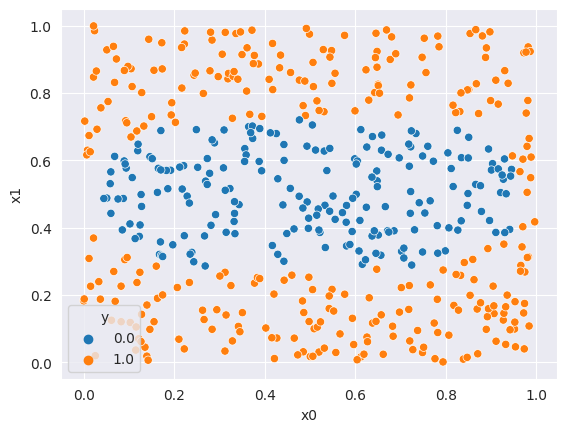

In [167]:
from scipy import stats

sns.scatterplot(x='x0', y='x1', hue='y', data=data_2_train)
plt.savefig("dataset2.png")

### [2.3] Fit and Evaluate Model

You may notice that the algorithm that worked pretty well on the first dataset comes up a bit short here. Feel free to add extra functionality to it and/or the data preprocessing pipeline that might improve performance. As a debugging reference; it is possible to obtain accuracies over 80%, both on train and the test set.

degree: 2, 	 accuracy: 0.628 	 cross entropy: 2.7124475570157403
degree: 3, 	 accuracy: 0.906 	 cross entropy: 0.2551593425969949
degree: 4, 	 accuracy: 0.934 	 cross entropy: 0.1386720653825567
degree: 5, 	 accuracy: 0.944 	 cross entropy: 0.16058170231649535
degree: 6, 	 accuracy: 0.944 	 cross entropy: 0.17553199543000356
degree: 7, 	 accuracy: 0.942 	 cross entropy: 0.18633036447887483
degree: 8, 	 accuracy: 0.942 	 cross entropy: 0.19379081459671643
degree: 9, 	 accuracy: 0.944 	 cross entropy: 0.19828766003424664
degree: 10, 	 accuracy: 0.946 	 cross entropy: 0.20057795189296804


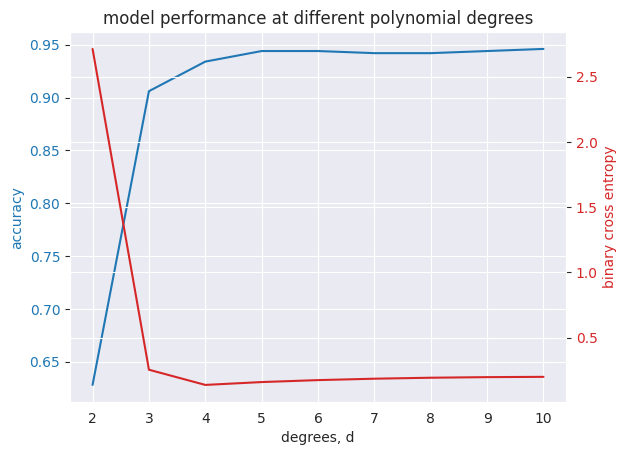

In [185]:
degrees = np.arange(2, 11)
accuracies, cross_entropies = lr.polynomial_degree_tester(np.asarray(X_train), y_train, degrees)


fig, ax1 = plt.subplots()
ax1.set_xlabel('degrees, d')
ax1.set_ylabel('accuracy', color='tab:blue')
ax1.plot(degrees, accuracies, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2 = ax1.twinx()
ax2.set_ylabel('binary cross entropy', color='tab:red')
ax2.plot(degrees, cross_entropies, color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
plt.title('model performance at different polynomial degrees')
plt.savefig("model_performance.png")
plt.show()

In [191]:
# Fit model (TO TRAIN SET ONLY)
poly_transformer = lr.PolynomialTransformer(degree=5)

model_2_poly = lr.LogisticRegression(poly_transformer)  # <--- Feel free to add hyperparameters
model_2_poly.fit(X_train, y_train)

# Calculate accuracy and cross entropy for insample predictions 
y_pred_train = model_2_poly.predict(X_train)
print('Train')
print(f'Accuracy: {lr.binary_accuracy(y_true=y_train, y_pred=y_pred_train, threshold=0.5) :.3f}')
print(f'Cross Entropy:  {lr.binary_cross_entropy(y_true=y_train, y_pred=y_pred_train) :.3f}')

# Calculate accuracy and cross entropy for out-of-sample predictions
y_pred_test = model_2_poly.predict(X_test)
print('\nTest')
print(f'Accuracy: {lr.binary_accuracy(y_true=y_test, y_pred=y_pred_test, threshold=0.5) :.3f}')
print(f'Cross Entropy:  {lr.binary_cross_entropy(y_true=y_test, y_pred=y_pred_test) :.3f}')

Train
Accuracy: 0.944
Cross Entropy:  0.161

Test
Accuracy: 0.928
Cross Entropy:  0.248


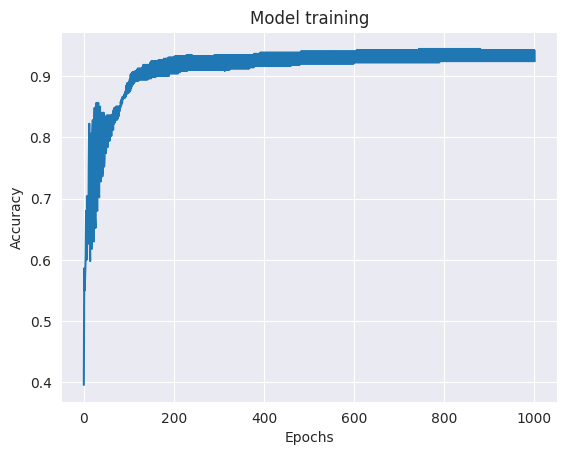

In [187]:
plt.plot(np.arange(model_2_poly.finishing_epoch+1), model_2_poly.training_accuracies)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model training")
plt.savefig("model_training_2.png")

## [3] Further Steps (optional)

If you're done with the assignment but want to some more challenges; consider the following:

- Try a different objective function (e.g. [hinge-loss](https://en.wikipedia.org/wiki/Hinge_loss)). How does this affect the classifier?
- Try a more sophisticated stopping criterion than a fixed number of epochs
- Try a different optimization algorithm than simple gradient descent, for instance:
    - The [ADAM](https://optimization.cbe.cornell.edu/index.php?title=Adam) optimizer is a variation of gradient descent that is quite popular in deep learning.
    - The quasi-newton method [BGFS](https://optimization.cbe.cornell.edu/index.php?title=Quasi-Newton_methods#BFGS_method), which typically converge much faster
- Try to generalize your classifier to a [Multilayer Perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron) neural network classifier.

